In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [15]:
df = pd.read_csv('C:\\Users\\Sankaran\\Downloads\\Chennai_MagicBricks_Synthetic.csv')
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,1626,4,2,Furnished,Perambur,0,17787803,Ready_to_move,Resale,Apartment,10939.61
1,1959,1,2,Furnished,T. Nagar,1,15423442,Under_Construction,Resale,Independent_House,7873.12
2,1360,1,2,Semi-Furnished,Guindy,1,5599865,Under_Construction,New_Property,Independent_House,4117.55
3,1794,1,3,Furnished,T. Nagar,0,15456244,Under_Construction,New_Property,Independent_House,8615.52
4,1630,3,2,Semi-Furnished,Guindy,2,19816674,Under_Construction,Resale,Apartment,12157.47


In [17]:
df.shape

(100, 11)

In [7]:
df.isnull().sum()

Locality       0
Min ₹/sq ft    0
Avg ₹/sq ft    0
Max ₹/sq ft    0
Q‑o‑Q Trend    0
BHK Type       0
dtype: int64

In [19]:
df['Per_Sqft'] = df['Per_Sqft'].fillna(df['Price']/df['Area'])

In [23]:
df['Parking'].fillna(df['Parking'].mode()[0])
df['Bathroom'].fillna(df['Bathroom'].mode()[0])
df['Furnishing'].fillna(df['Furnishing'].mode()[0])
df['Type'].fillna(df['Type'].mode()[0])

0             Apartment
1     Independent_House
2     Independent_House
3     Independent_House
4             Apartment
            ...        
95    Independent_House
96        Builder_Floor
97        Builder_Floor
98    Independent_House
99            Apartment
Name: Type, Length: 100, dtype: object

In [25]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [27]:
df.dtypes

Area             int64
BHK              int64
Bathroom         int64
Furnishing      object
Locality        object
Parking          int64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [29]:
df[['Parking', 'Bathroom']].astype('int64')

,Parking,Bathroom
0,0,2
1,1,2
2,1,2
3,0,3
4,2,2
...,...,...
95,0,2
96,0,2
97,2,3
98,0,3


In [31]:
df.nunique()

Area            97
BHK              4
Bathroom         3
Furnishing       3
Locality        10
Parking          3
Price          100
Status           2
Transaction      2
Type             3
Per_Sqft       100
dtype: int64

In [33]:
print(df['Area'].value_counts(),'\n', df['BHK'].value_counts(),'\n', df['Bathroom'].value_counts(),'\n', df['Parking'].value_counts(),'\n', df['Furnishing'].value_counts(),'\n', df['Status'].value_counts(),'\n', df['Transaction'].value_counts(),'\n', df['Type'].value_counts(),'\n', df['Per_Sqft'].value_counts())

Area
1455    2
1794    2
1457    2
1626    1
1890    1
       ..
1247    1
752     1
521     1
1837    1
687     1
Name: count, Length: 97, dtype: int64 
 BHK
3    34
1    30
4    21
2    15
Name: count, dtype: int64 
 Bathroom
3    36
2    32
1    32
Name: count, dtype: int64 
 Parking
0    43
1    29
2    28
Name: count, dtype: int64 
 Furnishing
Furnished         39
Semi-Furnished    32
Unfurnished       29
Name: count, dtype: int64 
 Status
Ready_to_move         59
Under_Construction    41
Name: count, dtype: int64 
 Transaction
Resale          53
New_Property    47
Name: count, dtype: int64 
 Type
Builder_Floor        34
Apartment            33
Independent_House    33
Name: count, dtype: int64 
 Per_Sqft
10939.61    1
6689.05     1
7746.98     1
4219.21     1
4332.61     1
           ..
24513.75    1
24804.68    1
3498.21     1
6682.22     1
21323.31    1
Name: count, Length: 100, dtype: int64


In [35]:
df['Area_Yards'] = df['Area']/9

In [37]:
df['Locality'].unique()

array(['Perambur', 'T. Nagar', 'Guindy', 'Adyar', 'Kodambakkam',
       'Mylapore', 'Sholinganallur', 'Velachery', 'Anna Nagar',
       'Tambaram'], dtype=object)

In [39]:
def grp_local(locality):
    locality = locality.lower() # avoid case sensitive
    if 'rohini' in locality:
        return 'Rohini Sector'
    elif 'dwarka' in locality:
        return 'Dwarka Sector'
    elif 'shahdara' in locality:
        return 'Shahdara'
    elif 'vasant' in locality:
        return 'Vasant Kunj'
    elif 'paschim' in locality:
        return 'Paschim Vihar'
    elif 'alaknanda' in locality:
        return 'Alaknanda'
    elif 'vasundhar' in locality:
        return 'Vasundhara Enclave'
    elif 'punjabi' in locality:
        return 'Punjabi Bagh'
    elif 'kalkaji' in locality:
        return 'Kalkaji'
    elif 'lajpat' in locality:
        return 'Lajpat Nagar'
    else:
        return 'Other'

df['Locality'] = df['Locality'].apply(grp_local)

In [41]:
df['Locality'].value_counts()

Locality
Other    100
Name: count, dtype: int64

In [43]:
from scipy import stats
# Z score
z = np.abs(stats.zscore(df[df.dtypes[df.dtypes != 'object'].index]))
# Removing outliers
df = df[(z < 3).all(axis=1)]

In [45]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft,Area_Yards
count,99.000000,99.000000,99.000000,99.000000,9.900000e+01,99.000000,99.000000
mean,1293.494949,2.474747,2.030303,0.848485,1.107586e+07,9508.117374,143.721661
std,438.510730,1.127969,0.826284,0.837436,4.913392e+06,5565.596993,48.723414
min,513.000000,1.000000,1.000000,0.000000,2.197775e+06,2255.760000,57.000000
25%,894.000000,1.000000,1.000000,0.000000,7.211716e+06,5377.350000,99.333333
50%,1315.000000,3.000000,2.000000,1.000000,1.124677e+07,7944.180000,146.111111
75%,1629.500000,3.000000,3.000000,2.000000,1.540593e+07,12116.940000,181.055556
max,1999.000000,4.000000,3.000000,2.000000,1.981667e+07,26168.450000,222.111111


In [47]:
df.head(10)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Area_Yards
0,1626,4,2,Furnished,Other,0,17787803,Ready_to_move,Resale,Apartment,10939.61,180.666667
1,1959,1,2,Furnished,Other,1,15423442,Under_Construction,Resale,Independent_House,7873.12,217.666667
2,1360,1,2,Semi-Furnished,Other,1,5599865,Under_Construction,New_Property,Independent_House,4117.55,151.111111
3,1794,1,3,Furnished,Other,0,15456244,Under_Construction,New_Property,Independent_House,8615.52,199.333333
4,1630,3,2,Semi-Furnished,Other,2,19816674,Under_Construction,Resale,Apartment,12157.47,181.111111
5,1595,1,3,Furnished,Other,1,5772811,Under_Construction,Resale,Builder_Floor,3619.32,177.222222
6,1544,1,1,Furnished,Other,1,4317336,Under_Construction,Resale,Apartment,2796.20,171.555556
7,621,1,3,Unfurnished,Other,1,4763642,Under_Construction,Resale,Builder_Floor,7670.92,69.000000
8,966,3,2,Unfurnished,Other,0,9689684,Under_Construction,New_Property,Independent_House,10030.73,107.333333
9,1738,1,1,Furnished,Other,1,12198499,Under_Construction,Resale,Independent_House,7018.70,193.111111


Text(0.5, 1.0, 'Area in Yards')

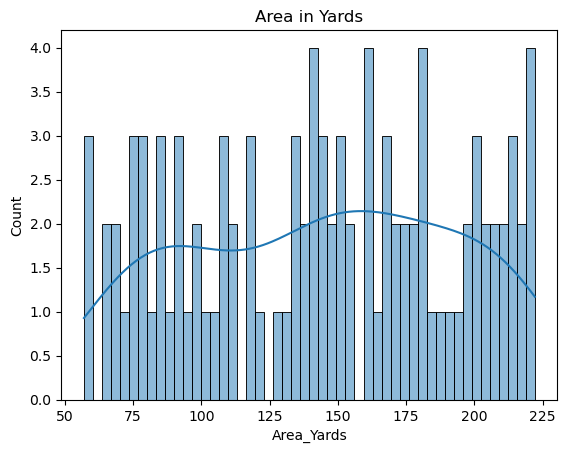

In [49]:
sns.histplot(x = df['Area_Yards'],  kde = True, bins = 50).set_title('Area in Yards')

Text(0.5, 1.0, 'BHK')

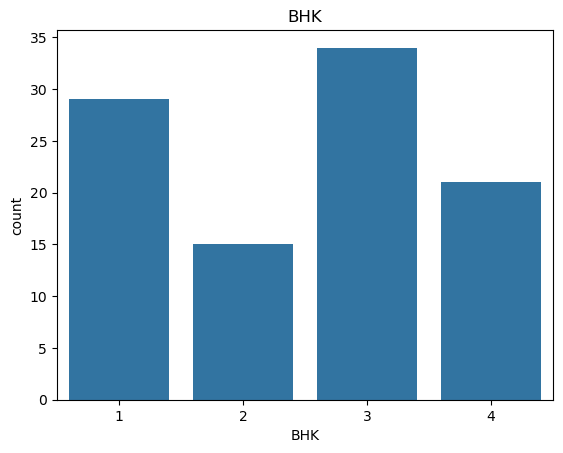

In [51]:
sns.countplot(x = 'BHK', data = df).set_title('BHK')

Text(0.5, 1.0, 'Bathroom')

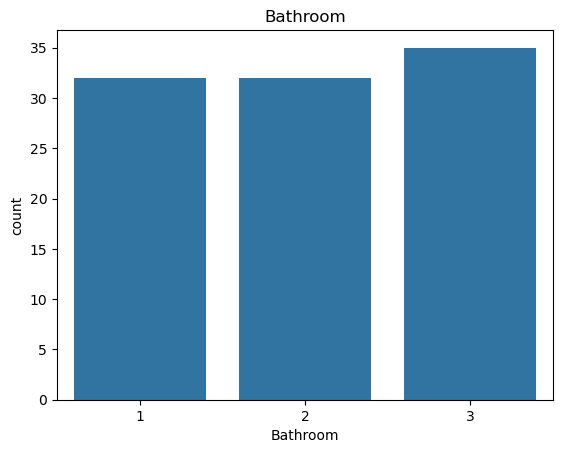

In [53]:
sns.countplot(x = 'Bathroom', data = df).set_title('Bathroom')

Text(0.5, 1.0, 'Furnishing')

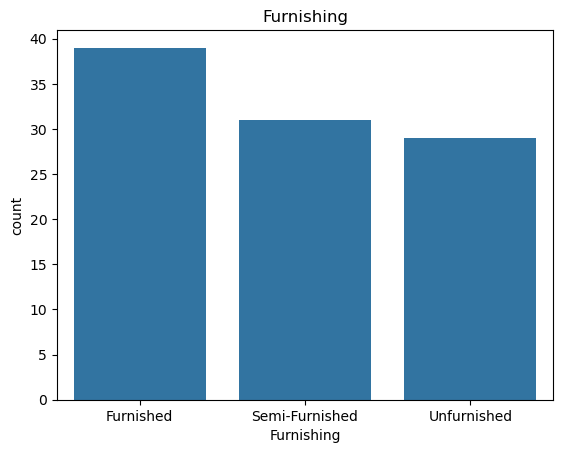

In [55]:
sns.countplot(x='Furnishing',data=df).set_title('Furnishing')

([0], [Text(0, 0, 'Other')])

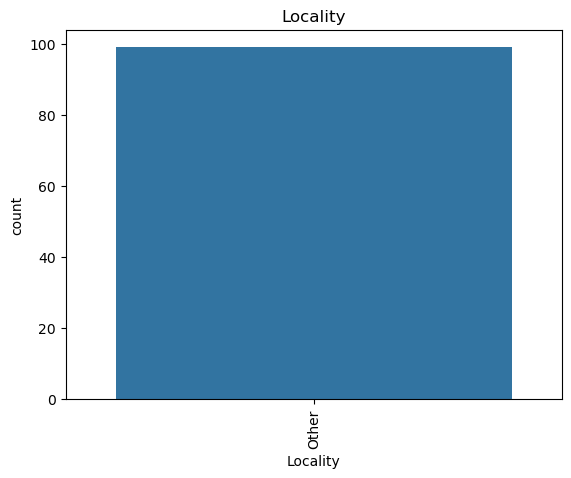

In [57]:
sns.countplot(x = 'Locality', data = df).set_title('Locality')
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'Parking')

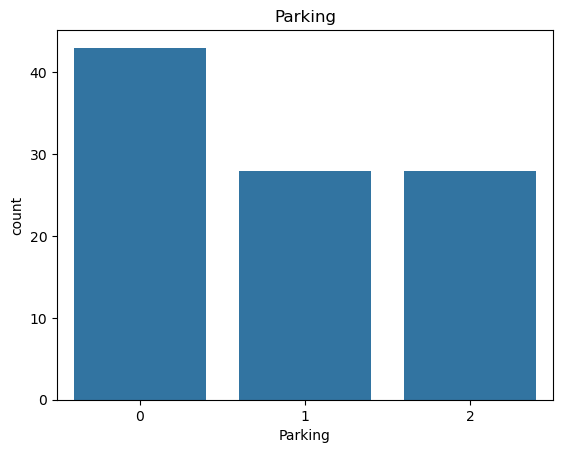

In [59]:
sns.countplot(x = 'Parking', data = df).set_title('Parking')

Text(0.5, 1.0, 'Status of the Property')

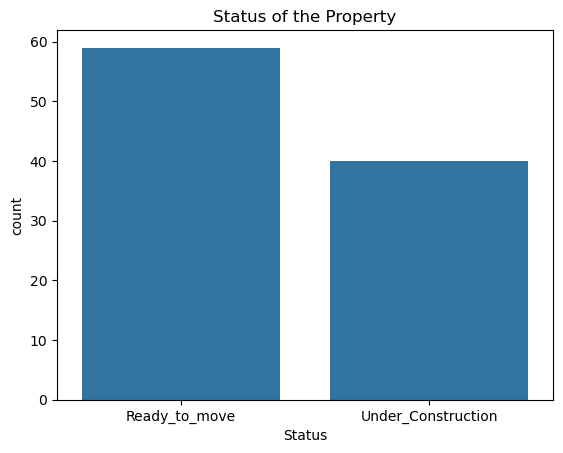

In [61]:
sns.countplot(x = 'Status', data = df).set_title('Status of the Property')

Text(0.5, 1.0, 'Transaction Type')

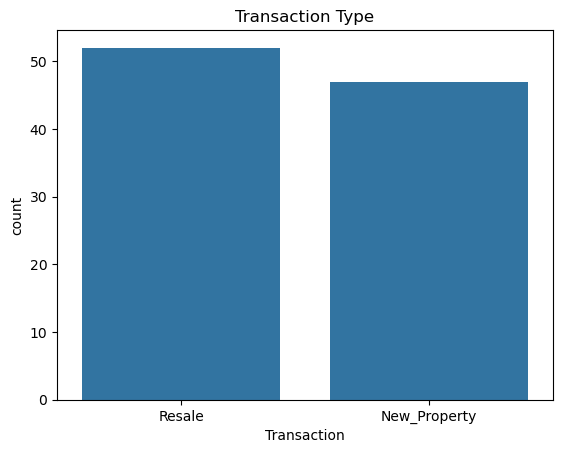

In [63]:
sns.countplot(x='Transaction', data=df).set_title('Transaction Type')

Text(0.5, 1.0, 'Type of House')

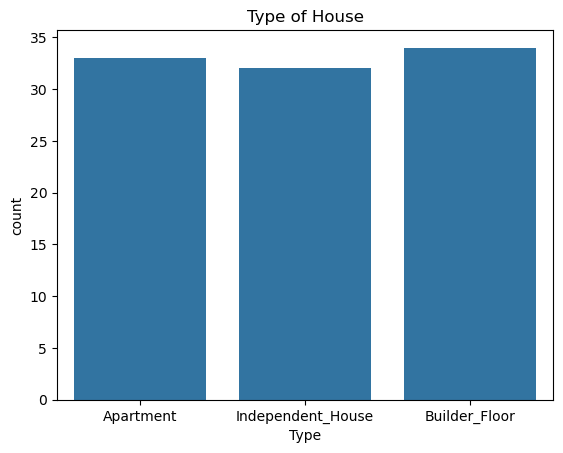

In [65]:
sns.countplot(x='Type',data=df).set_title('Type of House')

<Axes: xlabel='Area_Yards', ylabel='Price'>

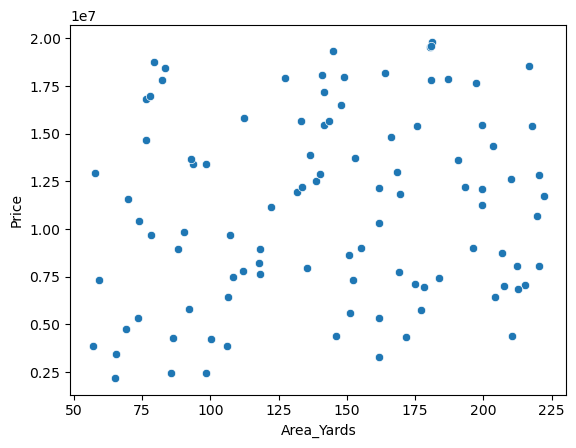

In [67]:
sns.scatterplot(x = 'Area_Yards', y = 'Price', data = df)

Text(0.5, 1.0, 'BHK vs Price')

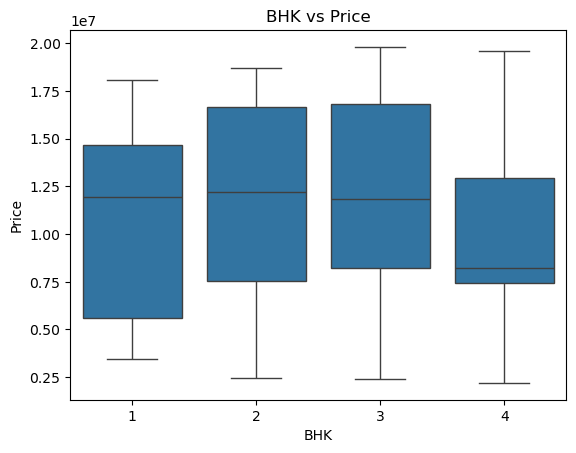

In [69]:
sns.boxplot(x = 'BHK', y = 'Price', data = df).set_title('BHK vs Price')

Text(0.5, 1.0, 'Bathroom vs Price')

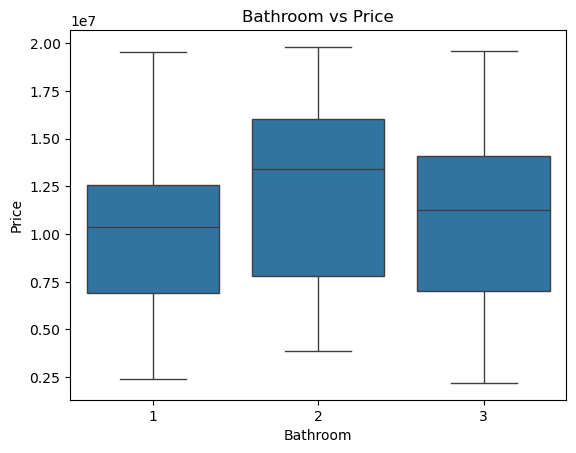

In [71]:
sns.boxplot(x = 'Bathroom', y = 'Price', data = df).set_title('Bathroom vs Price')

Text(0.5, 1.0, 'Parking vs Price')

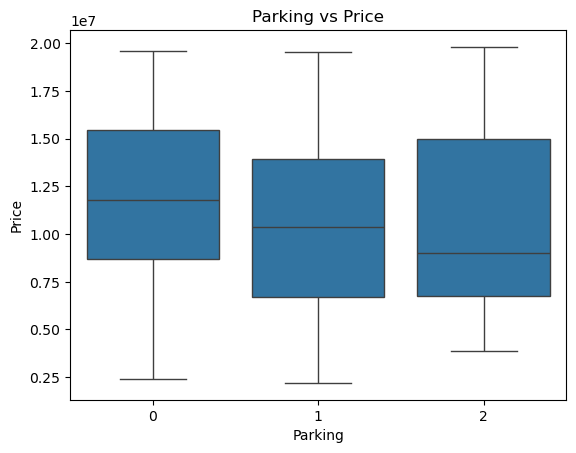

In [73]:
sns.boxplot(x = 'Parking', y = 'Price', data = df).set_title('Parking vs Price')

([0], [Text(0, 0, 'Other')])

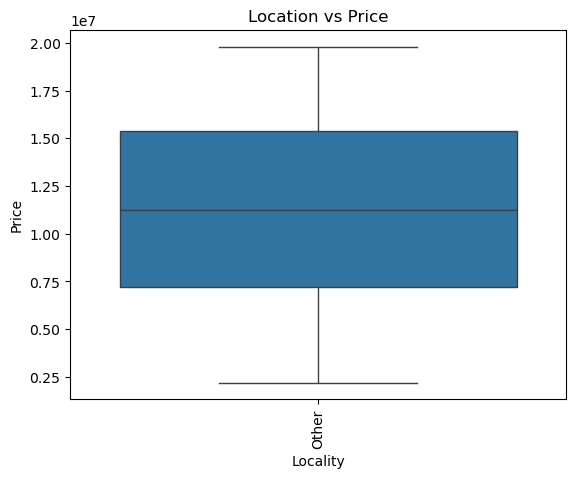

In [75]:
sns.boxplot(x='Locality', y='Price', data=df).set_title('Location vs Price')
plt.xticks(rotation=90)


Text(0.5, 1.0, 'Furnishing vs Price')

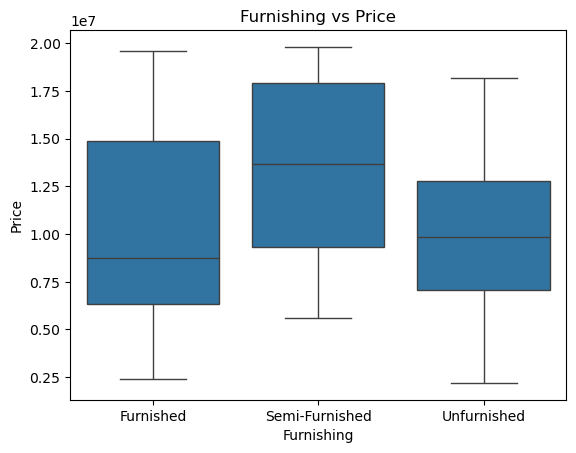

In [77]:
sns.boxplot(x = 'Furnishing', y = 'Price', data = df).set_title('Furnishing vs Price')

Text(0.5, 1.0, 'Price vs Status')

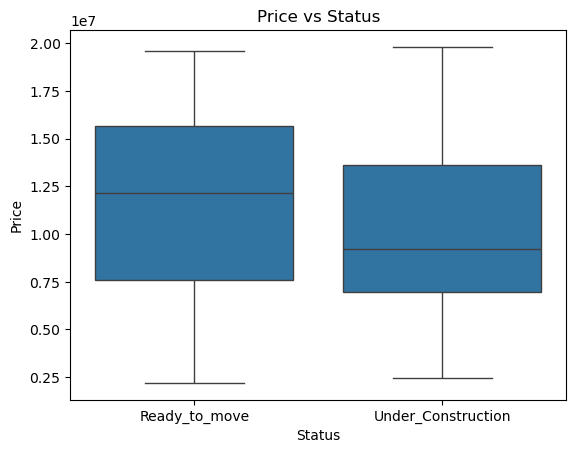

In [79]:
sns.boxplot(x = 'Status', y = 'Price', data = df).set_title('Price vs Status')

Text(0.5, 1.0, 'Transaction vs Price')

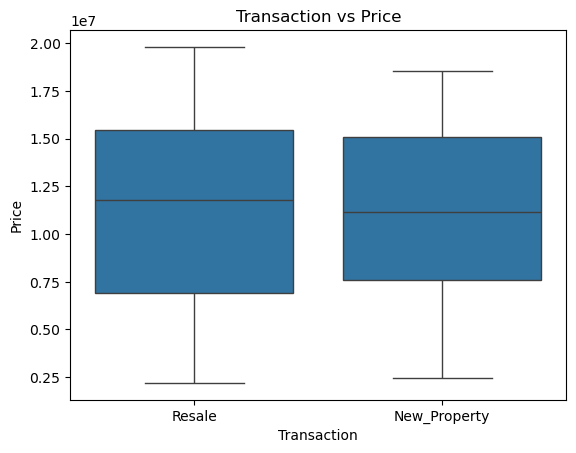

In [81]:
sns.boxplot(x = 'Transaction', y = 'Price', data = df).set_title('Transaction vs Price')

Text(0.5, 1.0, 'Price vs Type')

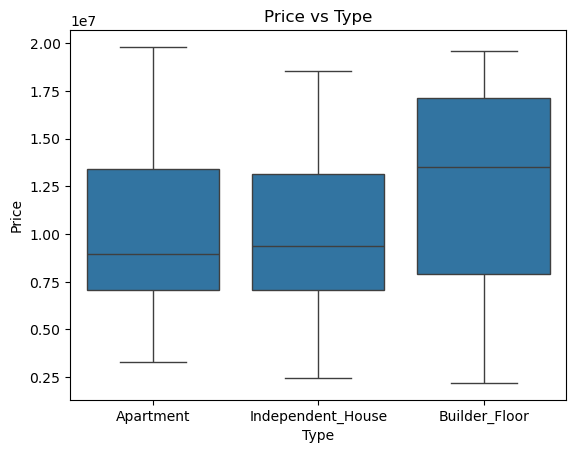

In [83]:
sns.boxplot(x = 'Type', y = 'Price', data = df).set_title('Price vs Type')

In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Columns for label encoding
cols = ['Furnishing', 'Locality', 'Status', 'Transaction', 'Type']

for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Furnishing [0 1 2]
Locality [0]
Status [0 1]
Transaction [1 0]
Type [0 2 1]


In [87]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df[['Area', 'Price', 'Per_Sqft', 'Area_Yards']] = MinMaxScaler().fit_transform(df[['Area', 'Price', 'Per_Sqft', 'Area_Yards']])

In [89]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Area_Yards
0,0.748991,4,2,0,0,0,0.884847,0,1,0,0.363148,0.748991
1,0.973082,1,2,0,0,1,0.750652,1,1,2,0.234911,0.973082
2,0.569987,1,2,1,0,1,0.193093,1,0,2,0.077858,0.569987
3,0.862046,1,3,0,0,0,0.752514,1,0,2,0.265958,0.862046
4,0.751682,3,2,1,0,2,1.000000,1,1,0,0.414078,0.751682


<Axes: >

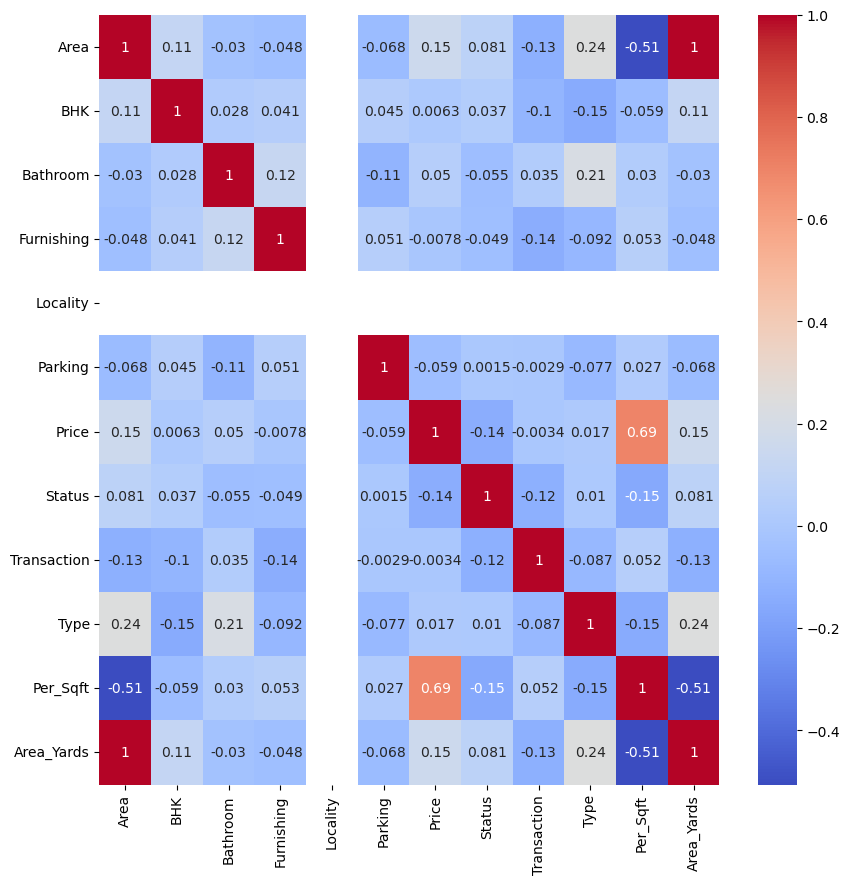

In [91]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [94]:
df.drop(['Per_Sqft'],axis=1,inplace=True)

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price',axis=1), df['Price'], test_size=0.2, random_state=42)

In [98]:
from sklearn.tree import DecisionTreeRegressor

#creating Decision Tree Regressor object
dtr = DecisionTreeRegressor()

In [102]:
from sklearn.model_selection import GridSearchCV

# Defining parameters
parameters  = {'max_depth':[2,4,6,8],
               'min_samples_split':[2,4,6,8],
               'min_samples_leaf':[1,2,3,4],
               'max_features':[None,'sqrt','log2'],
               'random_state':[0,42]}

# Creating GridSearchCV object
grid_search = GridSearchCV(dtr, parameters, cv=5, scoring='neg_mean_squared_error')

# Fitting data to grid search object
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'random_state': 0}


In [108]:
from sklearn.tree import DecisionTreeRegressor

# Re-initialize the model with valid parameters
dtr = DecisionTreeRegressor(
    max_depth=4, 
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',   # 'sqrt', 'log2', int, float, or None are valid
    random_state=0
)

# Now fit safely
dtr.fit(X_train, y_train)



DecisionTreeRegressor(max_depth=4, max_features='sqrt', random_state=0)

In [112]:
dtr.score(X_train, y_train)

0.3098403572939922

In [114]:
d_pred = dtr.predict(X_test)

In [116]:
dft = pd.DataFrame({'Actual': y_test, 'Predicted': d_pred})
dft.reset_index(drop=True, inplace=True)
dft.head(10)

,Actual,Predicted
0,0.592802,0.517214
1,0.061801,0.417219
2,0.763086,0.517214
3,0.901388,0.517214
4,0.605942,0.548584
5,0.123468,0.517214
6,0.482204,0.200770
7,0.460733,0.417219
8,0.203791,0.417219
9,0.884847,0.517214


C:\Users\Sankaran\AppData\Local\Temp\ipykernel_12480\3339549931.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dft['Actual'], color = 'r', label = 'Actual Price', hist = False)
C:\Users\Sankaran\AppData\Local\Temp\ipykernel_12480\3339549931.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

<Axes: xlabel='Predicted', ylabel='Density'>

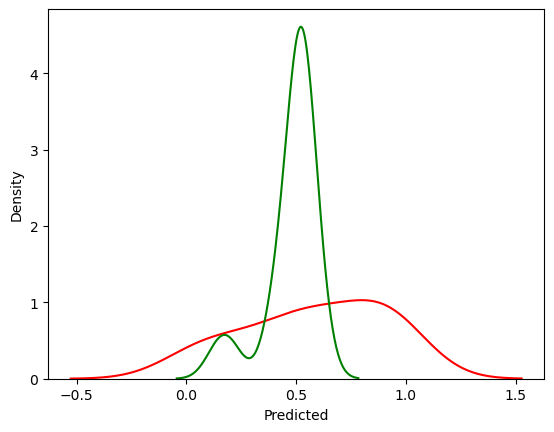

In [118]:
ax = sns.distplot(dft['Actual'], color = 'r', label = 'Actual Price', hist = False)
sns.distplot(dft['Predicted'], color = 'g', label = 'Predicted Price', ax=ax, hist = False)

In [120]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 Score: ", r2_score(y_test, d_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, d_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, d_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, d_pred)))

R2 Score:  0.17844087801013597
Mean Squared Error:  0.07992408203772831
Mean Absolute Error:  0.2480855227475221
Root Mean Squared Error:  0.2827084753553178


In [122]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor Object
rfr = RandomForestRegressor()
rfr

RandomForestRegressor()

In [124]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [126]:
rfr.score(X_train, y_train)

0.8662818122051907

In [128]:
r_pred = rfr.predict(X_test)

In [130]:
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': r_pred})
dfr.reset_index(drop=True, inplace=True)
dfr.head(10)

,Actual,Predicted
0,0.592802,0.476908
1,0.061801,0.463122
2,0.763086,0.737279
3,0.901388,0.594603
4,0.605942,0.631361
5,0.123468,0.614968
6,0.482204,0.554632
7,0.460733,0.480262
8,0.203791,0.407642
9,0.884847,0.565054
